In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import shutil
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
scores_csv = pd.read_csv('/content/drive/MyDrive/galaxy-segmentation-project/scores.csv')

iterables = [['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'Jaccard'], ['th=1', 'th=2', 'th=3', 'th=4'], ['Only spirals', 'All images']]
headers = pd.MultiIndex.from_product(iterables)

df_scores = pd.DataFrame(columns=headers, index=range(len(scores_csv)))
df_scores.insert(0, 'Galaxy ID', 0)

df_scores[:] = scores_csv[0:]

In [ ]:
temp = df_scores['Jaccard', 'th=3', 'All images'].dropna().sort_values(ascending=False)
sorted_gal = df_scores['Galaxy ID'].loc[temp.index]
best_ids = sorted_gal[:30].values
worst_ids = sorted_gal[-30:].values

# Best predictions

In [ ]:
for gal in best_ids:
  path = f'/content/drive/MyDrive/galaxy-segmentation-project/Binary masks figures/'
  shutil.copy(f'{path}{gal}.jpg', f'{path}Best predictions')
  image = mpimg.imread(f'/content/drive/MyDrive/galaxy-segmentation-project/Binary masks figures/{gal}.jpg')
  plt.figure(figsize=(22,13))
  plt.axis('off')
  plt.imshow(image)

FileNotFoundError: ignored

# Worst predictions

In [ ]:
for gal in worst_ids:
  path = f'/content/drive/MyDrive/galaxy-segmentation-project/Binary masks figures/'
  shutil.copy(f'{path}{gal}.jpg', f'{path}Worst predictions')
  image = mpimg.imread(f'/content/drive/MyDrive/galaxy-segmentation-project/Binary masks figures/{gal}.jpg')
  plt.figure(figsize=(22,13))
  plt.axis('off')
  plt.imshow(image)

# Scores distributions

In [3]:
th = 3

accuracy = df_scores['Accuracy', f'th={th}', 'All images'][df_scores['Accuracy', f'th={th}', 'All images']!=1].dropna()
precision = df_scores['Precision', f'th={th}', 'All images'][np.logical_and(df_scores['Precision', f'th={th}', 'All images']!=0, df_scores['Precision', f'th={th}', 'All images']!=1)].dropna()
sensitivity = df_scores['Sensitivity', f'th={th}', 'All images'][df_scores['Sensitivity', f'th={th}', 'All images']!=0].dropna()
specificity = df_scores['Specificity', f'th={th}', 'All images'][df_scores['Specificity', f'th={th}', 'All images']!=0].dropna()
jaccard = df_scores['Jaccard', f'th={th}', 'All images'][df_scores['Jaccard', f'th={th}', 'All images']!=0].dropna()

In [ ]:
import statistics
statistics.stdev(jaccard)

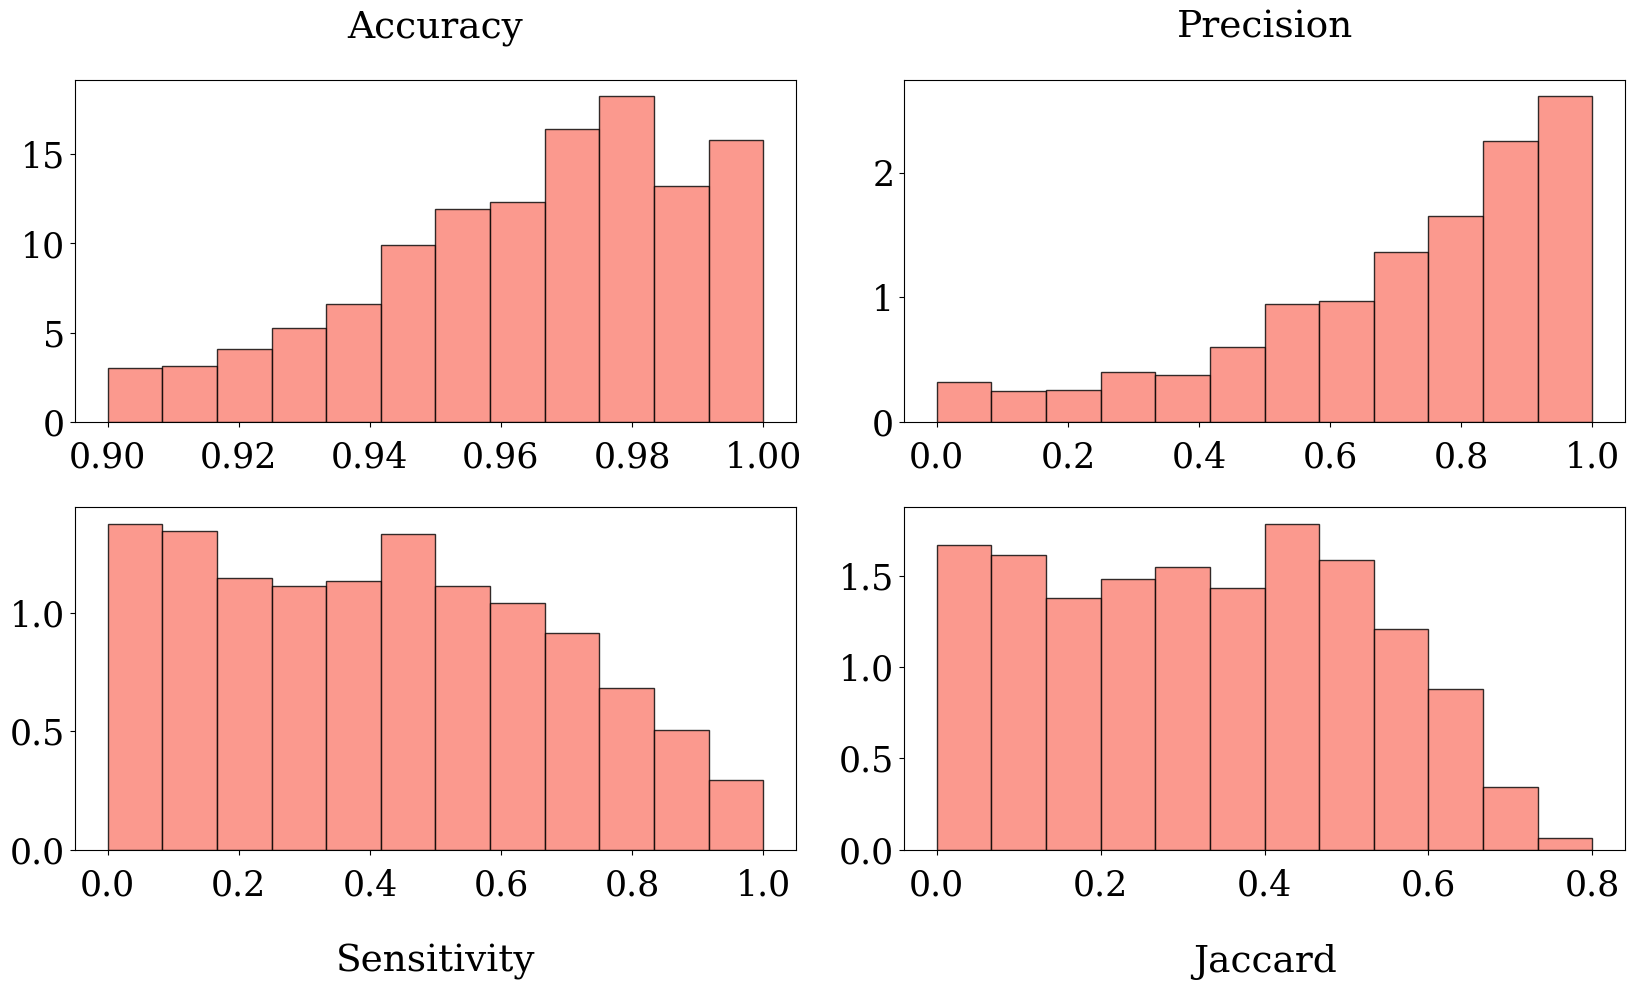

In [10]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'DejaVu Serif'
bins_1 = np.linspace(0, 1, 13)
bins_2 = 'auto'

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0,0].hist(accuracy, np.linspace(0.9, 1, 13), color='salmon', linewidth=1, edgecolor='k', alpha=0.8, density=True)
ax[0,1].hist(precision, bins=bins_1, color='salmon', linewidth=1, edgecolor='k', alpha=0.8, density=True)
ax[1,0].hist(sensitivity, bins=bins_1, color='salmon', linewidth=1, edgecolor='k', alpha=0.8, density=True)
ax[1,1].hist(jaccard, bins=np.linspace(0, 0.8, 13), color='salmon', linewidth=1, edgecolor='k', alpha=0.8, density=True)
# ax[0,0].vlines(np.mean(accuracy), 0, 261, linestyle='--', color='blue', linewidth=3)
# ax[0,1].vlines(np.mean(precision), 0, 220, linestyle='--', color='orangered', linewidth=3)
# ax[1,0].vlines(np.mean(sensitivity), 0, 132, linestyle='--', color='magenta', linewidth=3)
# ax[1,1].vlines(np.mean(jaccard), 0, 135, linestyle='--', color='green', linewidth=3)
[axi.tick_params(axis='both', which='both', labelsize=25) for axi in ax.ravel()]
[axi.tick_params(axis='x', pad=10) for axi in ax.ravel()]
ax[0,0].set_title('Accuracy', fontsize=27, pad=30)
ax[0,1].set_title('Precision', fontsize=27, pad=30)
ax[1,0].set_xlabel('Sensitivity', fontsize=27, labelpad=30)
ax[1,1].set_xlabel('Jaccard', fontsize=27, labelpad=30)
# ax[0,0].set_ylabel('# of images', fontsize=27, labelpad=35)
# ax[1,0].set_ylabel('# of images', fontsize=27, labelpad=35)
ax[0,1].yaxis.set_label_position('right')
ax[1,1].yaxis.set_label_position('right')
plt.subplots_adjust(hspace=0.25, wspace=0.15)
fig.show()